In [175]:
import pandas as pd
import numpy as np

In [176]:
data = pd.read_csv('export.csv')
data.head()

C:\Users\callm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (107,143,151) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2017,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Behavior recode for analysis,AYA site recode/WHO 2008,...,SS seq # - mal (least detail),SS seq # 1975+ - mal (least detail),SS seq # 1992+ - mal (least detail),SS seq # 2000+ - mal (least detail),Site - malignant (least detail),Patient ID,Type of Reporting Source,Marital status at diagnosis,Median household income inflation adj to 2018,Rural-Urban Continuum Code
0,65-69 years,Male,2000,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,19,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
1,35-39 years,Female,2008,Not PRCDA,White,Spanish-Hispanic-Latino,Hispanic (All Races),Rectosigmoid Junction,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,25,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
2,80-84 years,Female,2008,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Ascending Colon,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,337,Hospital inpatient/outpatient or clinic,Widowed,"$75,000+",Counties in metropolitan areas ge 1 million pop
3,65-69 years,Female,2014,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,465,Hospital inpatient/outpatient or clinic,Single (never married),"$75,000+",Counties in metropolitan areas ge 1 million pop
4,75-79 years,Male,2004,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Rectum,Malignant,8.6.1 Carcinoma of colon and rectum,...,1,1,1,1,Colon and Rectum - mal,764,Hospital inpatient/outpatient or clinic,Married (including common law),"$75,000+",Counties in metropolitan areas ge 1 million pop


## Removing columns and rows

In [177]:
(data == 'Blank(s)').sum(axis=0)

Age recode with <1 year olds                     0
Sex                                              0
Year of diagnosis                                0
PRCDA 2017                                       0
Race recode (W, B, AI, API)                      0
                                                ..
Patient ID                                       0
Type of Reporting Source                         0
Marital status at diagnosis                      0
Median household income inflation adj to 2018    0
Rural-Urban Continuum Code                       0
Length: 196, dtype: int64

In [178]:
data = data.loc[:, data.isin(['Blank(s)']).mean() < .4]

**Sum of "Blank(s)" within each column, remove column with over 60% "Blank(s)"
Removed 76 columns, from 196 to 120 columns**

In [179]:
for col in data:
    print(data[col].unique())

['65-69 years' '35-39 years' '80-84 years' '75-79 years' '60-64 years'
 '70-74 years' '45-49 years' '85+ years' '40-44 years' '50-54 years'
 '55-59 years' '30-34 years' '20-24 years' '25-29 years' '15-19 years'
 '00 years' '10-14 years' '05-09 years' '01-04 years']
['Male' 'Female']
[2000 2008 2014 2004 2011 2007 2009 2005 2017 2015 2001 2016 2012 2006
 2003 2013 2002 2010]
['Not PRCDA' 'PRCDA' 'Unknown PRCDA']
['White' 'Asian or Pacific Islander' 'American Indian/Alaska Native'
 'Black' 'Unknown']
['Non-Spanish-Hispanic-Latino' 'Spanish-Hispanic-Latino']
['Non-Hispanic White' 'Hispanic (All Races)'
 'Non-Hispanic Asian or Pacific Islander' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native' 'Non-Hispanic Unknown Race']
['Rectum' 'Rectosigmoid Junction' 'Ascending Colon' 'Appendix'
 'Sigmoid Colon' 'Cecum' 'Large Intestine, NOS' 'Transverse Colon'
 'Splenic Flexure' 'Descending Colon' 'Hepatic Flexure']
['Malignant']
['8.6.1 Carcinoma of colon and rectum'
 '10 Unspecifie

['8140/3: Adenocarcinoma, NOS' '8480/3: Mucinous adenocarcinoma'
 '8261/3: Adenocarcinoma in villous adenoma'
 '8246/3: Neuroendocrine carcinoma, NOS' '8000/3: Neoplasm, malignant'
 '8263/3: Adenocarcinoma in tubulovillous adenoma'
 '8210/3: Adenocarcinoma in adenomatous polyp'
 '8490/3: Signet ring cell carcinoma' '8240/3: Carcinoid tumor, NOS'
 '8243/3: Goblet cell carcinoid'
 '8083/3: Basaloid squamous cell carcinoma' '8010/3: Carcinoma, NOS'
 '8123/3: Basaloid carcinoma' '8481/3: Mucin-producing adenocarcinoma'
 '8262/3: Villous adenocarcinoma'
 '8936/3: Gastrointestinal stromal sarcoma'
 '8211/3: Tubular adenocarcinoma'
 '8244/3: Mixed adenoneuroendocrine carcinoma (ICD-O-3 update)'
 '8041/3: Small cell carcinoma, NOS'
 '8255/3: Adenocarcinoma with mixed subtypes'
 '8070/3: Squamous cell carcinoma, NOS' '8510/3: Medullary carcinoma, NOS'
 '8800/3: Sarcoma, NOS' '8560/3: Adenosquamous carcinoma'
 '8013/3: Large cell neuroendocrine carcinoma'
 '8890/3: Leiomyosarcoma, NOS' '8980/3: 

 'III(e.1) Pituitary adenomas and carcinomas']
['Localized' 'Distant' 'Regional' 'Unknown/unstaged']
['Blank(s)' 'Distant site(s)/node(s) involved'
 'Regional by both direct extension and lymph node involvement'
 'Regional lymph nodes involved only' 'Localized only'
 'Regional by direct extension only' 'Unknown/unstaged/unspecified/DCO'
 'Regional, NOS']
['Localized' 'Distant' 'Regional' 'Unstaged' 'Blank(s)']
['Blank(s)' 'IV' 'IIIB' 'IIA' 'IIIA' '0' 'I' 'UNK Stage' 'IIB' 'IIIC' nan
 'IIINOS']
['Blank(s)' 'T3' 'T1' 'TX' 'Tis' 'T2' 'T4' nan 'T0']
['Blank(s)' 'N1' 'N0' 'NX' 'N2' nan]
['Blank(s)' 'M1' 'M0' nan 'MX']
[nan 'Blank(s)']
[30  0 50 40 26 28 70 41 80 27 32 29 20 90 60 25 99 51 22 55 12 56 24 31
 61 10 23 65 21 57 11 13 66 14]
['Blank(s)' '4 or more regional lymph nodes removed' 'None'
 'Number of regional lymph nodes removed unknown'
 '1 to 3 regional lymph nodes removed' 'Unknown or not applicable'
 'Biopsy or aspiration of regional lymph node, NOS'
 'Sentinel node biopsy and l

['Dead (attributable to this cancer dx)' 'Alive or dead of other cause'
 'Dead (missing/unknown COD)' 'N/A not seq 0-59']
['Alive or dead due to cancer'
 'Dead (attributable to causes other than this cancer dx)'
 'Dead (missing/unknown COD)' 'N/A not seq 0-59']
['0049' '0119' '0000' '0042' '0004' '0158' '0074' '0029' '0080' '0059'
 '0110' '0127' '0002' '0006' '0001' '0026' '0053' '0023' '0013' '0015'
 '0175' '0007' '0067' '0177' '0030' '0019' '0113' '0020' '0155' '0011'
 '0083' '0205' '0095' '0041' '0181' '0043' '0071' '0073' '0112' '0092'
 '0062' '0003' '0055' '0100' '0010' '0191' '0114' '0056' '0060' '0065'
 '0136' '0022' '0061' '0037' '0129' '0145' '0197' '0031' '0098' '0125'
 '0012' '0075' '0046' '0185' '0198' '0077' '0048' '0016' '0038' '0142'
 '0094' '0146' '0134' '0078' '0033' '0104' '0076' '0079' '0005' '0025'
 '0058' '0028' '0143' '0034' '0164' '0069' '0207' '0123' '0206' '0017'
 '0171' '0186' '0021' '0170' '0044' '0027' '0101' '0141' '0126' '0201'
 '0018' '0039' '0050' '0052'

['Record sent for linkage, no IHS match'
 'Record sent for linkage, IHS match' 'Blank(s)']
['69 years' '39 years' '82 years' '67 years' '78 years' '64 years'
 '70 years' '76 years' '49 years' '91 years' '65 years' '41 years'
 '90 years' '54 years' '92 years' '55 years' '84 years' '45 years'
 '83 years' '87 years' '85 years' '47 years' '89 years' '88 years'
 '51 years' '63 years' '74 years' '81 years' '79 years' '48 years'
 '68 years' '72 years' '50 years' '93 years' '62 years' '66 years'
 '86 years' '58 years' '96 years' '56 years' '73 years' '59 years'
 '80 years' '34 years' '52 years' '40 years' '42 years' '61 years'
 '60 years' '53 years' '71 years' '77 years' '94 years' '97 years'
 '75 years' '57 years' '44 years' '95 years' '99 years' '43 years'
 '98 years' '100+ years' '46 years' '36 years' '33 years' '38 years'
 '22 years' '31 years' '29 years' '23 years' '30 years' '37 years'
 '35 years' '32 years' '18 years' '26 years' '28 years' '24 years'
 '27 years' '21 years' '25 years' '2

**List unique values of each column, select columns to delete based on redundancy, usefulness, past literature, and reference guide to column information from SEER database**

In [180]:
data.drop(data.iloc[:,77:116], axis = 1, inplace = True)

In [181]:
data.drop(data.iloc[:,74:75], axis = 1, inplace = True)

In [182]:
data.drop(data.iloc[:,68:73], axis = 1, inplace = True)

In [183]:
data.drop(data.iloc[:,47:51], axis = 1, inplace = True)

In [184]:
data.drop(data.columns[36], axis = 1, inplace = True)

In [185]:
data.drop(data.iloc[:,21:29], axis = 1, inplace = True)

In [186]:
data.drop(data.iloc[:,8:18], axis = 1, inplace = True)

In [187]:
data.drop(data.iloc[:,2:6], axis = 1, inplace = True)

**Narrow down columns with target class information. Group three column together to form 1 column that has labels either "dead", "alive" or "dead other". Drop 2 unnecessary columns, drop rows with "dead other"**

In [188]:
data.iloc[: , 37:40]

,COD to site recode,SEER cause-specific death classification,SEER other cause of death classification
0,Rectum and Rectosigmoid Junction,Dead (attributable to this cancer dx),Alive or dead due to cancer
1,Alive,Alive or dead of other cause,Alive or dead due to cancer
2,Chronic Obstructive Pulmonary Disease and Alli...,Alive or dead of other cause,Dead (attributable to causes other than this c...
3,Alive,Alive or dead of other cause,Alive or dead due to cancer
4,Other Cause of Death,Dead (attributable to this cancer dx),Alive or dead due to cancer
...,...,...,...
690445,Colon excluding Rectum,Dead (attributable to this cancer dx),Alive or dead due to cancer
690446,Rectum and Rectosigmoid Junction,Dead (attributable to this cancer dx),Alive or dead due to cancer
690447,Alive,Alive or dead of other cause,Alive or dead due to cancer
690448,Alive,Alive or dead of other cause,Alive or dead due to cancer


In [189]:
data.loc[data['COD to site recode'] == 'Alive', 'SEER cause-specific death classification'] = 'Alive'

In [190]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Alive or dead of other cause'], 'Dead Other')

In [191]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Dead (attributable to this cancer dx)'], 'Dead')

In [192]:
data['SEER cause-specific death classification'] = data['SEER cause-specific death classification'].replace(['Dead (missing/unknown COD)'], 'Dead Other')

In [193]:
data.drop(data.columns[37], axis = 1, inplace = True)

In [194]:
data.drop(data.columns[38], axis = 1, inplace = True)

In [195]:
data1 = data[data['SEER cause-specific death classification'] != "Dead Other"]

In [196]:
data1 = data1[data1['SEER cause-specific death classification'] != "N/A not seq 0-59"]

In [197]:
for col in data1:
    print(data1[col].unique())

['65-69 years' '35-39 years' '75-79 years' '60-64 years' '70-74 years'
 '40-44 years' '50-54 years' '85+ years' '55-59 years' '45-49 years'
 '80-84 years' '30-34 years' '20-24 years' '25-29 years' '15-19 years'
 '00 years' '10-14 years' '05-09 years' '01-04 years']
['Male' 'Female']
['Non-Hispanic White' 'Hispanic (All Races)'
 'Non-Hispanic Asian or Pacific Islander' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native' 'Non-Hispanic Unknown Race']
['Rectum' 'Rectosigmoid Junction' 'Appendix' 'Ascending Colon'
 'Sigmoid Colon' 'Splenic Flexure' 'Transverse Colon' 'Descending Colon'
 'Cecum' 'Hepatic Flexure' 'Large Intestine, NOS']
['Well differentiated; Grade I' 'Moderately differentiated; Grade II'
 'Unknown' 'Poorly differentiated; Grade III'
 'Undifferentiated; anaplastic; Grade IV']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, sing

['Single (never married)' 'Married (including common law)' 'Divorced'
 'Widowed' 'Unknown' 'Unmarried or Domestic Partner' 'Separated']
['$75,000+' '$65,000 - $69,999' '$70,000 - $74,999' '$60,000 - $64,999'
 '$55,000 - $59,999' '$45,000 - $49,999' '$40,000 - $44,999'
 '$50,000 - $54,999' '$35,000 - $39,999' '< $35,000'
 'Unknown/missing/no match/Not 1990-2017']
['Counties in metropolitan areas ge 1 million pop'
 'Counties in metropolitan areas of 250,000 to 1 million pop'
 'Nonmetropolitan counties adjacent to a metropolitan area'
 'Nonmetropolitan counties not adjacent to a metropolitan area'
 'Counties in metropolitan areas of lt 250 thousand pop'
 'Unknown/missing/no match/Not 1990-2017'
 'Unknown/missing/no match (Alaska or Hawaii - Entire State)']


In [198]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543412 entries, 0 to 690448
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   Age recode with <1 year olds                                543412 non-null  object
 1   Sex                                                         543412 non-null  object
 2   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  543412 non-null  object
 3   Site recode ICD-O-3/WHO 2008                                543412 non-null  object
 4   Grade                                                       543412 non-null  object
 5   Laterality                                                  543412 non-null  object
 6   Diagnostic Confirmation                                     543412 non-null  object
 7   Summary stage 2000 (1998+)                                  543412 non-null  object

### Review all possible 'unknown' labels, not only "Blank(s)" & Review each column closely
* [2]: 'Non-Hispanic Unknown Race'
* [4]: 'Unknown'
* [5]: 'Paired site, but no information concerning laterality'
* [6]: 'Unknown'
* [7]: 'Unknown/unstaged'
* [8]: 'Blank(s)', 'Unknown/unstaged/unspecified/DCO'
* [9]: 'Blank(s)', 'Unstaged'
* [10]: 'Blank(s)', nan, 'UNK Stage'
* [11]: 'Blank(s)', 'TX', nan
* [12]: 'Blank(s)', 'NX, nan
* [13]: 'Blank(s)', 'MX, nan
* [14]: '99'
* [15]: 'Blank(s)'
* [16]: **Remove** column completely, not as specific as other columns, redundant
* [21]: 'Blank(s)', 'Sequence unknown'
* [22]: '99', '126'
* [23]: '99', '126'
* [24]: 'Blank(s)', '999', '888', '1022'
* [25]: 'Blank(s)', '999' ## CS extension same as T Stage
* [26]: 'Blank(s)', '999' ## CS lymph nodes same as N Stage
* [27]: 'Blank(s)', '99' ## CS mets at dx same as M Stage
* [28, 29, 30]: **Remove** columns completley, used to determine last 3 columns
* [31]: 'Blank(s)', '999', '997' ##SSF1
* [32]: 'Blank(s)', '999', '988' ##SSF2, similar to N stage, no. of metastases in regional nodes or no. of regional nodes positive (may be removed as redundant)
* [33]: **Remove** completely, all values 'Blank(s)' or '988'
* [34, 35, 36]: **remove** completely, CS Version information
* [38]: 'Unknown'
* [42]: **Remove** column
* [44]: 'Unknown/missing/no match/Not 1990-2017'
* [45]: **Remove** column

In [199]:
data1.drop(data1.columns[45], axis = 1, inplace = True)

In [200]:
data1.drop(data1.columns[42], axis = 1, inplace = True)

In [201]:
data1.drop(data1.iloc[:,34:37], axis = 1, inplace = True)

In [202]:
data1.drop(data1.columns[33], axis = 1, inplace = True)

In [203]:
data1.drop(data1.iloc[:,28:31], axis = 1, inplace = True)

In [204]:
data1.drop(data1.columns[16], axis = 1, inplace = True)

In [205]:
data2 = data1[data1['Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)'] != 'Non-Hispanic Unknown Race']

In [206]:
data2 = data2[data2['Grade'] != 'Unknown']

In [207]:
data2 = data2[data2['Diagnostic Confirmation'] !='Unknown']

In [208]:
data2 = data2[data2['Summary stage 2000 (1998+)'] != 'Unknown/unstaged']

In [209]:
data2 = data2[data2['SEER Combined Summary Stage 2000 (2004+)'] != 'Unknown/unstaged/unspecified/DCO']

In [210]:
data2 = data2[(data2['SEER historic stage A (1973-2015)'] != 'Blank(s)') & (data2['SEER historic stage A (1973-2015)'] != 'Unstaged')]

In [211]:
data2 = data2[data2['Derived AJCC Stage Group, 6th ed (2004-2015)'] != 'UNK Stage']

In [212]:
data2 = data2[(data2['Derived AJCC T, 6th ed (2004-2015)'] != 'Blank(s)') & (data2['Derived AJCC T, 6th ed (2004-2015)'] != 'TX') & (data2['Derived AJCC T, 6th ed (2004-2015)'].notna())]

In [213]:
data2 = data2[data2['Derived AJCC N, 6th ed (2004-2015)'] != 'NX']

In [214]:
data2 = data2[data2['Derived AJCC M, 6th ed (2004-2015)'] != 'MX']

In [215]:
data2 = data2[data2['RX Summ--Surg Prim Site (1998+)'] != 99]

In [216]:
data2 = data2[(data2['RX Summ--Scope Reg LN Sur (2003+)'] != 'Number of regional lymph nodes removed unknown') & (data2['RX Summ--Scope Reg LN Sur (2003+)'] != 'Unknown or not applicable')]

In [217]:
data2 = data2[(data2['RX Summ--Systemic/Sur Seq'] != 'Blank(s)') & (data2['RX Summ--Systemic/Sur Seq'] != 'Sequence unknown')]

In [218]:
data2 = data2[(data2['Regional nodes examined (1988+)'] != 99) & (data2['Regional nodes examined (1988+)'] != 126)]

In [219]:
data2 = data2[(data2['Regional nodes positive (1988+)'] != 99) & (data2['Regional nodes positive (1988+)'] != 126)]

In [220]:
data2 = data2[(data2['CS tumor size (2004-2015)'] != '999') & (data2['CS tumor size (2004-2015)'] != '888') & (data2['CS tumor size (2004-2015)'] != '1022')] 

In [221]:
data2 = data2[data2['Survival months'] != 'Unknown']

In [222]:
data2 = data2[data2['Total number of in situ/malignant tumors for patient'] != 'Unknown']

In [223]:
data2 = data2[data2['Median household income inflation adj to 2018'] != 'Unknown/missing/no match/Not 1990-2017']

data3.columns[24:27] same as data3.columns[11:14] ##CS staging vs TNM staging

In [224]:
data2.drop(data2.iloc[:,24:27], axis = 1, inplace = True)

Drop column 24 (SSF1 because most values are unknown or test not ordered, codes: 080, 988, 997 and 999) and 25 (SSF2 because similar to N staging, most values are 000 or 999 or 998 which correspond to unknown / useless values)

In [225]:
data2['CS site-specific factor 1 (2004+ varying by schema)'].value_counts()

020         64886
010         50351
999         45950
998         29185
997          2139
Blank(s)     1498
030           641
Name: CS site-specific factor 1 (2004+ varying by schema), dtype: int64

In [226]:
data2['CS site-specific factor 2 (2004+ varying by schema)'].value_counts() 

000    127282
999     25220
988     17235
400     10488
100      5962
010      2769
200      2325
020      1773
110       951
120       645
Name: CS site-specific factor 2 (2004+ varying by schema), dtype: int64

In [227]:
data2.drop(data2.iloc[:,24:26], axis = 1, inplace = True)

In [228]:
data2.drop(columns=['Reason no cancer-directed surgery'], axis = 1, inplace = True)

In [229]:
data2.drop(columns=['Marital status at diagnosis'], axis = 1, inplace = True)

In [230]:
data2.drop(columns=['Summary stage 2000 (1998+)'], axis = 1, inplace = True)

In [231]:
data2.drop(columns=['SEER historic stage A (1973-2015)'], axis = 1, inplace = True)

In [232]:
for col in data2:
    print(data2[col].unique())

['35-39 years' '65-69 years' '70-74 years' '40-44 years' '80-84 years'
 '85+ years' '60-64 years' '50-54 years' '55-59 years' '75-79 years'
 '45-49 years' '30-34 years' '25-29 years' '15-19 years' '20-24 years'
 '10-14 years' '05-09 years']
['Female' 'Male']
['Hispanic (All Races)' 'Non-Hispanic Asian or Pacific Islander'
 'Non-Hispanic White' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native']
['Rectosigmoid Junction' 'Rectum' 'Ascending Colon' 'Sigmoid Colon'
 'Transverse Colon' 'Cecum' 'Hepatic Flexure' 'Descending Colon'
 'Splenic Flexure' 'Appendix' 'Large Intestine, NOS']
['Moderately differentiated; Grade II' 'Well differentiated; Grade I'
 'Poorly differentiated; Grade III'
 'Undifferentiated; anaplastic; Grade IV']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, single primary']
['Positive histology' 'Positive microscopic confir

In [233]:
data2 = data2.reset_index(drop=True)

## Cleaning up values

In [234]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194650 entries, 0 to 194649
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count   Dtype 
---  ------                                                      --------------   ----- 
 0   Age recode with <1 year olds                                194650 non-null  object
 1   Sex                                                         194650 non-null  object
 2   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)  194650 non-null  object
 3   Site recode ICD-O-3/WHO 2008                                194650 non-null  object
 4   Grade                                                       194650 non-null  object
 5   Laterality                                                  194650 non-null  object
 6   Diagnostic Confirmation                                     194650 non-null  object
 7   SEER Combined Summary Stage 2000 (2004+)                    194650 non-null  object

In [235]:
data2['CS tumor size (2004-2015)']=data2['CS tumor size (2004-2015)'].astype(int)

In [236]:
data2['Survival months']=data2['Survival months'].astype(int)

In [237]:
data2['Total number of in situ/malignant tumors for patient']=data2['Total number of in situ/malignant tumors for patient'].astype(int)

In [238]:
column_indices = [0, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26]
new_names = ['Age', 'Race', 'Site', 'Combined Summary Stage 2000', 'Derived AJCC Stage Group', 'Derived AJCC T', 'Derived AJCC N', 'Derived AJCC M', 'Surg Prim Site', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Regional nodes examined', 'Regional nodes positive', 'Tumor Size', 'Alive/Dead', 'Num of in situ/malignant tumors', 'Num of benign/borderline tumors', 'Median household income']
old_names = data2.columns[column_indices]
data2.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [239]:
data2['Grade'] = data2['Grade'].replace(['Moderately differentiated; Grade II','Well differentiated; Grade I','Poorly differentiated; Grade III','Undifferentiated; anaplastic; Grade IV'],['Grade II: Moderately differentiated','Grade I: Well differentiated','Grade III: Poorly differentiated','Grade IV: Undifferentiated; anaplastic'])

In [240]:
data2['Median household income'] = data2['Median household income'].replace(['< $35,000'],'$0 - $34,999')

In [241]:
data2['Radiation'] = data2['Radiation'].replace(['None/Unknown'],'No')

In [242]:
data2['Chemotherapy'] = data2['Chemotherapy'].replace(['No/Unknown'],'No')

# Binning

### Creating bins for survival months, if survived 24 months, considered 24-35 group (i.e. 2 years +)

In [243]:
degrees = ["0-23", "24-59", ">=60"]
column = data2['Survival months']

data2['Survival months'] = pd.cut(column, [-1, 23, 59, np.inf], labels=degrees)
pd.value_counts(data2['Survival months'])

>=60     79727
24-59    73058
0-23     41865
Name: Survival months, dtype: int64

### Creating bins for tumor size

000: No mass/tumor found  
001-988: 001 - 988 millimeters (Exact size in mm)  
989: 989 mm or larger  
990: Microscopic focus or foci only, no size of focus given  
991: Described as "less than 1 cm"  
992: Described as "less than 2 cm," or "greater than 1 cm," or "between 1 cm and 2 cm"  
993: Described as "less than 3 cm," or "greater than 2 cm," or "between 2 cm and 3 cm"  
994: Described as "less than 4 cm," or "greater than 3 cm," or "between 3 cm and 4 cm"  
995: Described as "less than 5 cm," or "greater than 4 cm," or "between 4 cm and 5 cm"  
998: Familial/multiple polyposis (M-8220/8221)  
https://staging.seer.cancer.gov/cs/input/02.05.50/colon/size/?breadcrumbs=(~schema_list~),(~view_schema~,~colon~)

In [244]:
data3 = data2.loc[(data2['Tumor Size'] >= 1) & (data2['Tumor Size'] <= 988)].copy()

In [245]:
data4 = data2.loc[(data2['Tumor Size'] == 0) | (data2['Tumor Size'] == 989) | (data2['Tumor Size'] == 990) | (data2['Tumor Size'] == 991) | (data2['Tumor Size'] == 992) | (data2['Tumor Size'] == 993) | (data2['Tumor Size'] == 994) | (data2['Tumor Size'] == 995) | (data2['Tumor Size'] == 998)].copy()

In [246]:
data4["Tumor Size"].value_counts().sum()

1607

In [247]:
data3["Tumor Size"].count()

193043

In [248]:
t_degrees = ["1-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99", "100-149", "150-199", "200-299", "300-399", "400-499", "500-599", "600-699", "700-799", "800-899", "900-989"]
column = data3['Tumor Size']

data3['Tumor Size'] = pd.cut(column, [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 149, 199, 299, 399, 499, 599, 699, 799, 899, 989], labels=t_degrees)
pd.value_counts(data3['Tumor Size'])

40-49      33242
30-39      33067
50-59      27083
20-29      24568
60-69      18250
10-19      14719
70-79      11930
1-9         9084
80-89       8110
100-149     7362
90-99       4560
150-199      689
200-299      157
300-399       55
500-599       41
400-499       33
900-989       29
800-899       24
700-799       21
600-699       19
Name: Tumor Size, dtype: int64

In [249]:
level_map={0: '0', 990: "Foci only", 991: '1-9', 992: '10-19', 993: '20-29', 994: '30-39', 995: '40-49', 989: '989+', 998: "multiple polyposis"}
data4['Tumor Size']=data4['Tumor Size'].replace(level_map)

In [250]:
data2 = pd.concat([data3, data4])

## Explore values using barplot, histograms, boxplot and value counts

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
data2["Alive/Dead"].value_counts()

Alive    127015
Dead      67635
Name: Alive/Dead, dtype: int64

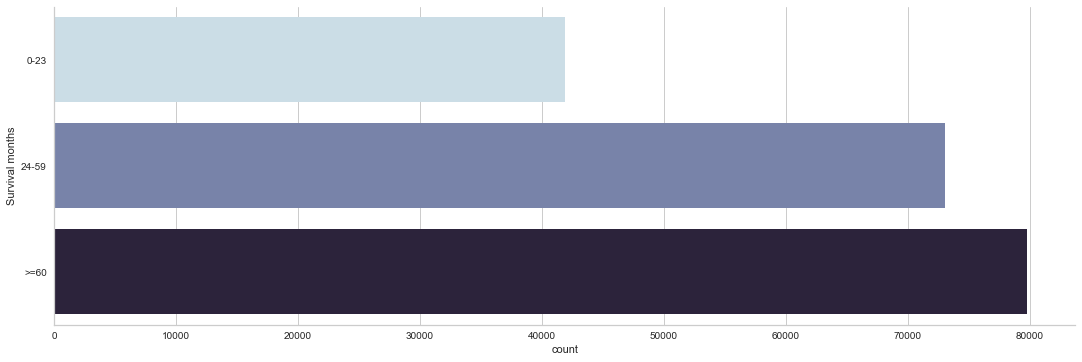

In [253]:
sns.catplot(y="Survival months", kind="count", aspect= 3, order=sorted(data2['Survival months'].unique()), palette="ch:s=.25, rot=-.25", data=data2)

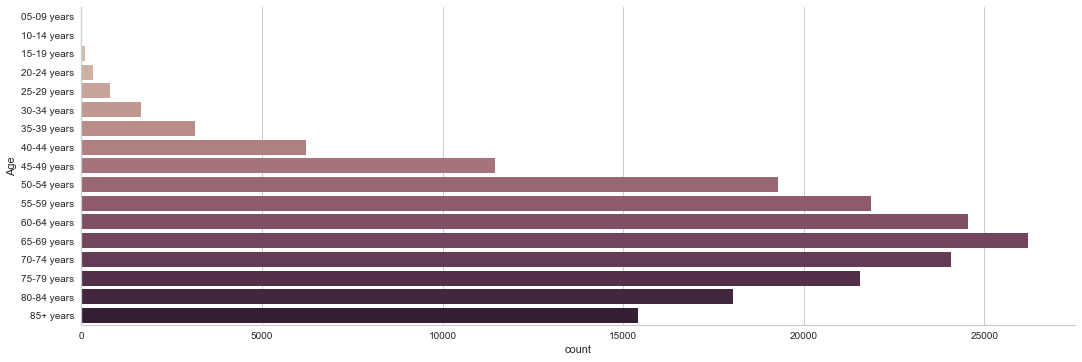

In [254]:
sns.catplot(y="Age", kind="count", aspect = 3, order=sorted(data2.Age.unique()), palette="ch:.25", data=data2)

Non-Hispanic White                            133723
Non-Hispanic Black                             22834
Hispanic (All Races)                           20736
Non-Hispanic Asian or Pacific Islander         16015
Non-Hispanic American Indian/Alaska Native      1342
Name: Race, dtype: int64

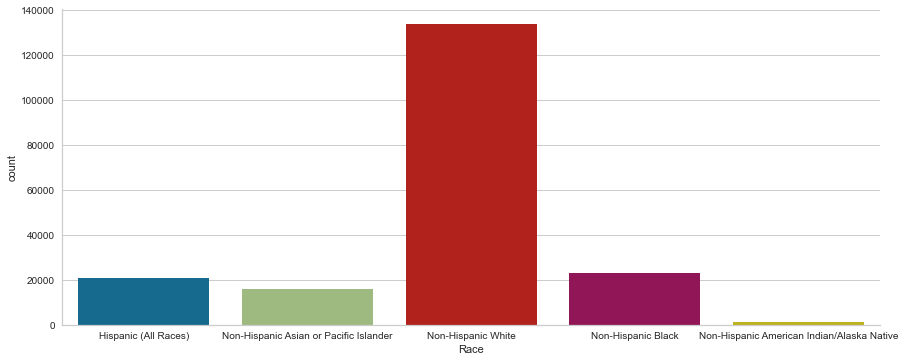

In [255]:
sns.catplot(x="Race", kind="count", aspect=2.5, data=data2)
data2["Race"].value_counts()

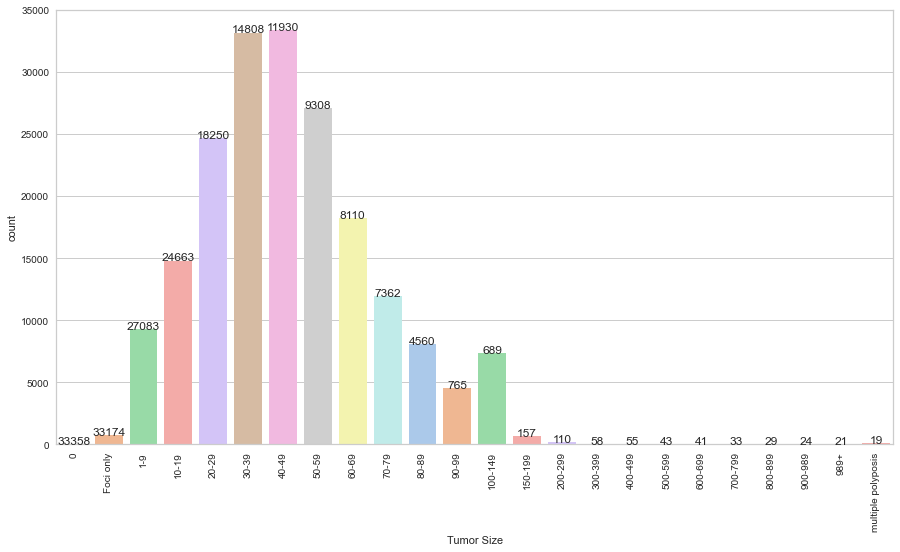

In [256]:
plt.figure(figsize=(15,8))
graph = sns.countplot(x="Tumor Size", palette = 'pastel', data=data2, order=['0','Foci only','1-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-149','150-199','200-299','300-399','400-499','500-599','600-699','700-799','800-899','900-989','989+','multiple polyposis'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        data2['Tumor Size'].value_counts()[i],ha="center")
    i += 1
plt.show()

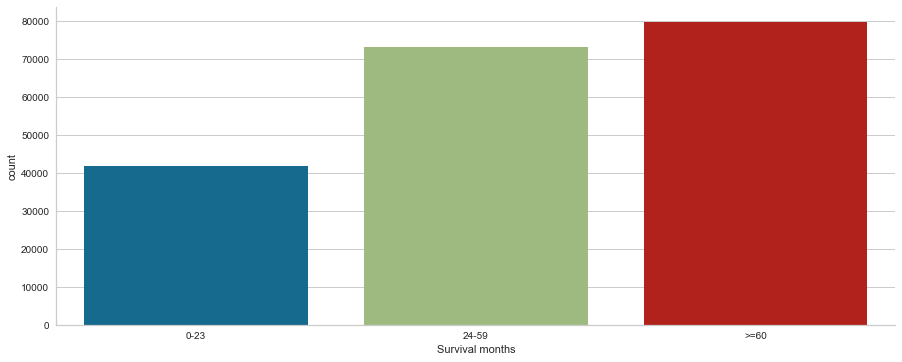

In [257]:
sns.catplot(x="Survival months", kind="count", aspect=2.5, data=data2)

# Apriori

import matplotlib.pyplot as plt
!pip install apyori
from apyori import apriori

records = []
for i in range(0, 500):
    records.append([str(data2.values[i,j]) for j in range(0, 5)])

association_rules = apriori(records, min_support=0.05, min_confidence=0.5, min_lift=1)
association_results = list(association_rules)

association_results

## Encode ordinal and nominal categorical data

### Ordinal

In [258]:
for col in data2:
    print(data2[col].unique())

['35-39 years' '65-69 years' '70-74 years' '40-44 years' '80-84 years'
 '85+ years' '60-64 years' '50-54 years' '55-59 years' '75-79 years'
 '45-49 years' '30-34 years' '25-29 years' '15-19 years' '20-24 years'
 '10-14 years' '05-09 years']
['Female' 'Male']
['Hispanic (All Races)' 'Non-Hispanic Asian or Pacific Islander'
 'Non-Hispanic White' 'Non-Hispanic Black'
 'Non-Hispanic American Indian/Alaska Native']
['Rectosigmoid Junction' 'Rectum' 'Ascending Colon' 'Sigmoid Colon'
 'Transverse Colon' 'Cecum' 'Hepatic Flexure' 'Descending Colon'
 'Splenic Flexure' 'Appendix' 'Large Intestine, NOS']
['Grade II: Moderately differentiated' 'Grade I: Well differentiated'
 'Grade III: Poorly differentiated'
 'Grade IV: Undifferentiated; anaplastic']
['Not a paired  site' 'Right - origin of primary'
 'Left - origin of primary'
 'Paired site, but no information concerning laterality'
 'Only one side - side unspecified' 'Bilateral, single primary']
['Positive histology' 'Positive microscopic confir

Split data into ordinal, nominal or continuous categories

In [259]:
from sklearn.preprocessing import OrdinalEncoder

In [260]:
l_m = {'0':0,'Foci only':1, '1-9':2, '10-19':3, '20-29':4, '30-39':5,'40-49':6,'50-59':7,'60-69':8, '70-79':9 , '80-89':10, '90-99':11, '100-149':12, '150-199':13, '200-299':14, '300-399':15, '400-499':16, '500-599':17, '600-699':18, '700-799': 19, '800-899':20, '900-989':21, '989+':22,  'multiple polyposis':23}
data2['Tumor Size']=data2['Tumor Size'].replace(l_m)

In [261]:
level_mapping={'T0':0, 'Tis':1, 'T1':2, 'T2':3, 'T3':4, 'T4':5}
data2['Derived AJCC T']=data2['Derived AJCC T'].replace(level_mapping)

In [262]:
enc = OrdinalEncoder()
enc.fit(data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]])
data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]] = enc.transform(data2[["Age", "Grade", "Derived AJCC Stage Group", "Derived AJCC M", "Derived AJCC N", "Median household income", "Survival months"]]).astype(int)

In [263]:
data2[['Age','Grade','Derived AJCC Stage Group', 'Derived AJCC T', 'Derived AJCC M', 'Derived AJCC N', 'Median household income', 'Survival months', 'Tumor Size']].head(20)

,Age,Grade,Derived AJCC Stage Group,Derived AJCC T,Derived AJCC M,Derived AJCC N,Median household income,Survival months,Tumor Size
0,6,1,7,4,1,1,9,2,5
1,12,1,5,4,0,1,9,1,7
2,13,1,4,2,0,1,9,2,3
3,12,0,0,1,0,0,9,2,2
4,7,1,1,3,0,0,9,2,5
5,15,1,1,3,0,0,9,0,6
6,16,1,2,4,0,0,9,1,5
7,16,1,5,4,0,1,9,0,12
8,11,1,7,4,1,0,9,1,10
9,13,1,2,4,0,0,9,2,5


### Nominal

In [264]:
sorted(data2.Sex.unique())

['Female', 'Male']

In [265]:
from sklearn import preprocessing
from collections import defaultdict

In [266]:
import joblib

In [267]:
dic = defaultdict(preprocessing.LabelEncoder)

In [268]:
le = preprocessing.LabelEncoder()

In [269]:
data2[['Sex', 'Race', 'Site', 'Laterality', 'Diagnostic Confirmation', 'Combined Summary Stage 2000', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Alive/Dead', 'Primary by international rules']] = data2[['Sex', 'Race', 'Site', 'Laterality', 'Diagnostic Confirmation', 'Combined Summary Stage 2000', 'Scope Reg Lymph Node Surg', 'Surg/Rad Seq', 'Radiation', 'Chemotherapy', 'Systemic/Sur Seq', 'Alive/Dead', 'Primary by international rules']].apply(lambda x: dic[x.name].fit_transform(x))

In [270]:
for k in dic:
    nom_dict = pd.DataFrame.from_dict(dict(zip(dic[k].classes_, le.fit_transform(dic[k].classes_, ))), orient='index')
    print(nom_dict)

        0
Female  0
Male    1
                                            0
Hispanic (All Races)                        0
Non-Hispanic American Indian/Alaska Native  1
Non-Hispanic Asian or Pacific Islander      2
Non-Hispanic Black                          3
Non-Hispanic White                          4
                        0
Appendix                0
Ascending Colon         1
Cecum                   2
Descending Colon        3
Hepatic Flexure         4
Large Intestine, NOS    5
Rectosigmoid Junction   6
Rectum                  7
Sigmoid Colon           8
Splenic Flexure         9
Transverse Colon       10
                                                    0
Bilateral, single primary                           0
Left - origin of primary                            1
Not a paired  site                                  2
Only one side - side unspecified                    3
Paired site, but no information concerning late...  4
Right - origin of primary                           5
    

In [271]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194650 entries, 0 to 194495
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Age                              194650 non-null  int64
 1   Sex                              194650 non-null  int32
 2   Race                             194650 non-null  int32
 3   Site                             194650 non-null  int32
 4   Grade                            194650 non-null  int64
 5   Laterality                       194650 non-null  int32
 6   Diagnostic Confirmation          194650 non-null  int32
 7   Combined Summary Stage 2000      194650 non-null  int32
 8   Derived AJCC Stage Group         194650 non-null  int64
 9   Derived AJCC T                   194650 non-null  int64
 10  Derived AJCC N                   194650 non-null  int64
 11  Derived AJCC M                   194650 non-null  int64
 12  Surg Prim Site                

# Corr numerical / continuous, ChiSquare categorical / nominal

In [272]:
corr = data2[['Num of in situ/malignant tumors', 'Num of benign/borderline tumors', 'Survival months']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Num of in situ/malignant tumors,Num of benign/borderline tumors,Survival months
Num of in situ/malignant tumors,1.000000,0.014408,0.004282
Num of benign/borderline tumors,0.014408,1.000000,0.006162
Survival months,0.004282,0.006162,1.000000


<AxesSubplot:xlabel='Survival months', ylabel='Tumor Size'>

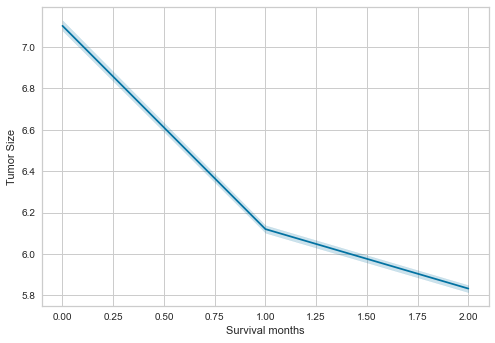

In [273]:
sns.lineplot(data=data2, y='Tumor Size', x='Survival months')

In [274]:
from scipy.stats import chisquare

In [275]:
chisquare(data2)

Power_divergenceResult(statistic=array([1.20238604e+05, 9.53480000e+04, 1.00081057e+05, 3.57004109e+05,
       6.06233031e+04, 4.40008119e+03, 5.75006795e+01, 1.98172253e+05,
       2.72199669e+05, 4.51090711e+04, 1.84006089e+05, 1.63533000e+05,
       6.03570401e+05, 7.16822877e+04, 5.46417580e+04, 6.78808403e+04,
       1.12087000e+05, 9.33029228e+04, 1.58593385e+06, 1.38745113e+07,
       2.02675817e+05, 1.27015000e+05, 9.56266849e+04, 5.82200000e+03,
       6.28152867e+04, 2.10882688e+05, 2.13408767e+05]), pvalue=array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 9.87617340e-009,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       3.22724257e-037, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 7.6

# Cluster

## Determine K

In [278]:
data_no_target = data2.drop(['Alive/Dead', 'Survival months'],axis=1)
data_target = data2[['Survival months']]

In [279]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [280]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_no_target)
    Sum_of_squared_distances.append(km.inertia_)

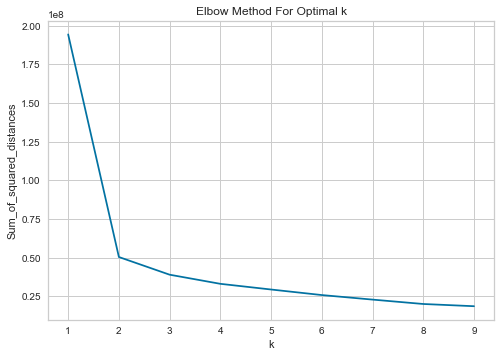

In [281]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [282]:
from sklearn.metrics import silhouette_score

In [283]:
!pip install yellowbrick

In [284]:
from yellowbrick.cluster import KElbowVisualizer

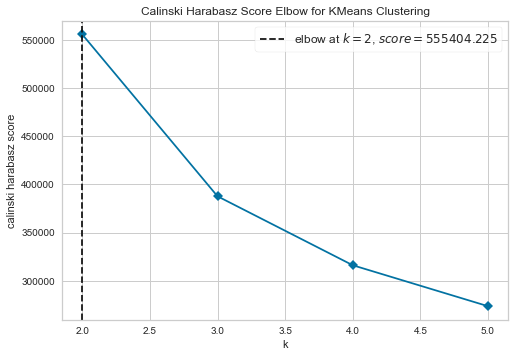

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [285]:
model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(2,6), metric='calinski_harabasz', timings=False)

visualizer.fit(data_no_target)    
visualizer.poof()

## K-means clustering

In [290]:
from sklearn.model_selection import train_test_split

X = data2.drop(['Alive/Dead', 'Survival months'],axis=1)
y = data2['Survival months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [292]:
def get_clusters(X_train: pd.DataFrame, X_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:

    clustering = KMeans(n_clusters=n_clusters, random_state=1022)
    clustering.fit(X_train)

    train_labels = clustering.labels_
    X_train_clstrs = X_train.copy()
    X_train_clstrs['clusters'] = train_labels
    

    test_labels = clustering.predict(X_test)
    X_test_clstrs = X_test.copy()
    X_test_clstrs['clusters'] = test_labels
    
    return X_train_clstrs, X_test_clstrs

In [293]:
X_train_clstrs, X_test_clstrs = get_clusters(X_train, X_test, 2)

## Scaling Data

In [294]:
from sklearn.preprocessing import StandardScaler
def scale_features(X_train_clstrs: pd.DataFrame, X_test_clstrs: pd.DataFrame):
    sc = StandardScaler()
    X_train_clstrs = sc.fit_transform(X_train_clstrs)
    X_test_clstrs = sc.transform (X_test_clstrs)
    
    return X_train_clstrs, X_test_clstrs
X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

In [295]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_clstrs.index, columns=X_train_clstrs.columns)

In [296]:
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_clstrs.index, columns=X_test_clstrs.columns)

## Split Data into 0, 1 and base Clusters

In [297]:
# locate the "0" cluster
X_train0 = X_train_scaled[X_train_scaled['clusters'] < 0]
X_test0 = X_test_scaled[X_test_scaled['clusters'] < 0]
y_train0 = y_train[X_train_scaled['clusters'] < 0]
y_test0 = y_test[X_test_scaled['clusters'] < 0]

# locate the "1" cluster
X_train1 = X_train_scaled[X_train_scaled['clusters'] > 0]
X_test1 = X_test_scaled[X_test_scaled['clusters'] > 0]
y_train1 = y_train[X_train_scaled['clusters'] > 0]
y_test1 = y_test[X_test_scaled['clusters'] > 0]

# drop cluster from the base dataset 
X_train_base = X_train_scaled.drop(columns=['clusters'])
X_test_base = X_test_scaled.drop(columns=['clusters'])
y_train_base = y_train.copy()
y_test_base = y_test.copy()

In [300]:
datasets = {
    'base': (X_train_base, y_train_base, X_test_base, y_test_base),
    'cluster-0': (X_train0, y_train0, X_test0, y_test0),
    'cluster-1': (X_train1, y_train1, X_test1, y_test1),
}

In [359]:
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Comparison of the RF, NB and LR on training set 

In [406]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=20)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_base, y_train_base, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.516421 (0.002691)
NB: 0.499923 (0.003036)
LR: 0.521830 (0.003470)


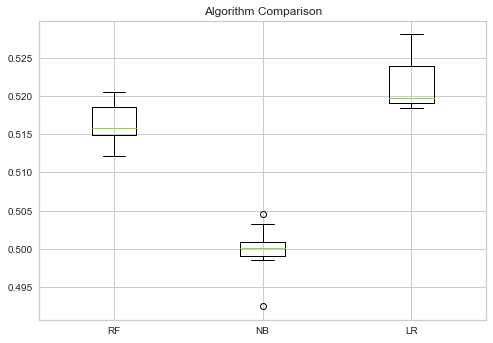

In [407]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### Logistic Regression on Base, 0 and 1 Clusters

In [380]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train_base, y_train_base)
predictions = lrmodel.predict(X_test_base)
print(accuracy_score(y_test_base, predictions))
print(confusion_matrix(y_test_base, predictions))
print(classification_report(y_test_base, predictions, digits=3))

0.5215001284356537
[[ 8802  1680  2077]
 [ 5619  5622 10684]
 [ 3007  4875 16029]]
              precision    recall  f1-score   support

           0       0.51      0.70      0.59     12559
           1       0.46      0.26      0.33     21925
           2       0.56      0.67      0.61     23911

    accuracy                           0.52     58395
   macro avg       0.51      0.54      0.51     58395
weighted avg       0.51      0.52      0.50     58395



In [381]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train0, y_train0)
predictions = lrmodel.predict(X_test0)
print(accuracy_score(y_test0, predictions))
print(confusion_matrix(y_test0, predictions))
print(classification_report(y_test0, predictions, digits=3))

0.5705482362940927
[[1214  215  161]
 [ 447  406  842]
 [ 113  243 1065]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1590
           1       0.47      0.24      0.32      1695
           2       0.51      0.75      0.61      1421

    accuracy                           0.57      4706
   macro avg       0.56      0.58      0.55      4706
weighted avg       0.56      0.57      0.54      4706



In [382]:
lrmodel = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)
lrmodel.fit(X_train1, y_train1)
predictions = lrmodel.predict(X_test1)
print(accuracy_score(y_test1, predictions))
print(confusion_matrix(y_test1, predictions))
print(classification_report(y_test1, predictions, digits=3))

0.5198644042541303
[[ 7683  1461  1825]
 [ 5162  5246  9822]
 [ 2922  4586 14982]]
              precision    recall  f1-score   support

           0       0.49      0.70      0.57     10969
           1       0.46      0.26      0.33     20230
           2       0.56      0.67      0.61     22490

    accuracy                           0.52     53689
   macro avg       0.50      0.54      0.51     53689
weighted avg       0.51      0.52      0.50     53689



### Random Forest on Base, 0 and 1 Clusters

In [378]:
rfmodel = RandomForestClassifier(n_estimators=20)
rfmodel.fit(X_train_base, y_train_base)
predictions = rfmodel.predict(X_test_base)
print(accuracy_score(y_test_base, predictions))
print(confusion_matrix(y_test_base, predictions))
print(classification_report(y_test_base, predictions, digits=3))

0.5142734823186916
[[ 6903  3390  2266]
 [ 3200  9228  9497]
 [ 1569  8442 13900]]
              precision    recall  f1-score   support

           0       0.59      0.55      0.57     12559
           1       0.44      0.42      0.43     21925
           2       0.54      0.58      0.56     23911

    accuracy                           0.51     58395
   macro avg       0.52      0.52      0.52     58395
weighted avg       0.51      0.51      0.51     58395



In [412]:
print(sorted(zip(map(lambda x: round(x, 4), rfmodel.feature_importances_), X_train_base.columns), reverse=True))

[(0.1526, 'Regional nodes examined'), (0.107, 'Tumor Size'), (0.1069, 'Age'), (0.0942, 'Median household income'), (0.0874, 'Site'), (0.0554, 'Surg Prim Site'), (0.0474, 'Regional nodes positive'), (0.0441, 'Race'), (0.0388, 'Num of in situ/malignant tumors'), (0.0385, 'Grade'), (0.0368, 'Combined Summary Stage 2000'), (0.0315, 'Sex'), (0.03, 'Derived AJCC T'), (0.0246, 'Derived AJCC Stage Group'), (0.0242, 'Derived AJCC M'), (0.0194, 'Systemic/Sur Seq'), (0.012, 'Chemotherapy'), (0.0109, 'Derived AJCC N'), (0.0093, 'Scope Reg Lymph Node Surg'), (0.0092, 'Radiation'), (0.0085, 'Surg/Rad Seq'), (0.0065, 'Primary by international rules'), (0.0028, 'Laterality'), (0.0017, 'Num of benign/borderline tumors'), (0.0004, 'Diagnostic Confirmation')]


In [363]:
rfmodel = RandomForestClassifier(n_estimators=20)
rfmodel = rfmodel.fit(X_train0, y_train0)
predictions = rfmodel.predict(X_test0)
print(confusion_matrix(y_test0, predictions))
print(classification_report(y_test0, predictions, digits=3))

[[1153  326  111]
 [ 432  730  533]
 [ 125  633  663]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1590
           1       0.43      0.43      0.43      1695
           2       0.51      0.47      0.49      1421

    accuracy                           0.54      4706
   macro avg       0.54      0.54      0.54      4706
weighted avg       0.54      0.54      0.54      4706



In [367]:
rfmodel = RandomForestClassifier(n_estimators=20)
rfmodel.fit(X_train1, y_train1)
predictions = rfmodel.predict(X_test1)
print(confusion_matrix(y_test1, predictions))
print(classification_report(y_test1, predictions, digits=3))

[[ 5712  3116  2141]
 [ 2838  8573  8819]
 [ 1446  7827 13217]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.54     10969
           1       0.44      0.42      0.43     20230
           2       0.55      0.59      0.57     22490

    accuracy                           0.51     53689
   macro avg       0.52      0.51      0.51     53689
weighted avg       0.51      0.51      0.51     53689



### Naive Bayes on Base, 0 and 1 Clusters

In [411]:
model = GaussianNB()
model.fit(X_train_base, y_train_base)
predictions = model.predict(X_test_base)
print(confusion_matrix(y_test_base, predictions))
print(classification_report(y_test_base, predictions, digits=3))

[[ 7473   641  4445]
 [ 4921  2048 14956]
 [ 2476  1838 19597]]
              precision    recall  f1-score   support

           0      0.503     0.595     0.545     12559
           1      0.452     0.093     0.155     21925
           2      0.503     0.820     0.623     23911

    accuracy                          0.499     58395
   macro avg      0.486     0.503     0.441     58395
weighted avg      0.484     0.499     0.430     58395



In [365]:
model = GaussianNB()
model.fit(X_train0, y_train0)
predictions = model.predict(X_test0)
print(confusion_matrix(y_test0, predictions))
print(classification_report(y_test0, predictions, digits=3))

[[1052   72  466]
 [ 444  141 1110]
 [ 121   74 1226]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      1590
           1       0.49      0.08      0.14      1695
           2       0.44      0.86      0.58      1421

    accuracy                           0.51      4706
   macro avg       0.53      0.54      0.46      4706
weighted avg       0.53      0.51      0.45      4706



In [366]:
model = GaussianNB()
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)
print(confusion_matrix(y_test1, predictions))
print(classification_report(y_test1, predictions, digits=3))

[[ 6350   648  3971]
 [ 4569  1836 13825]
 [ 2482  1508 18500]]
              precision    recall  f1-score   support

           0       0.47      0.58      0.52     10969
           1       0.46      0.09      0.15     20230
           2       0.51      0.82      0.63     22490

    accuracy                           0.50     53689
   macro avg       0.48      0.50      0.43     53689
weighted avg       0.48      0.50      0.43     53689



## Redo Kmeans and model using filtered dataset

In [286]:
data2_filt = data2.iloc[:, [9,10,11,15,16,19,20,21,22,24,25]]

In [287]:
filt_no_target = data2_filt.drop(['Alive/Dead', 'Survival months'],axis=1)
filt_target = data2_filt[['Survival months']]

In [288]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(filt_no_target)
    Sum_of_squared_distances.append(km.inertia_)

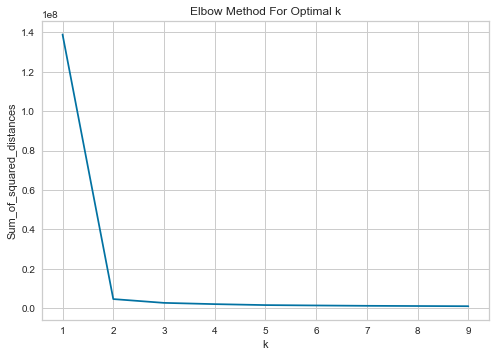

In [289]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [389]:
from sklearn.model_selection import train_test_split

Xf = data2_filt.drop(['Alive/Dead', 'Survival months'],axis=1)
yf = data2_filt['Survival months']

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.30, random_state=42)

In [390]:
from typing import Tuple

In [391]:
def get_clusters(Xf_train: pd.DataFrame, Xf_test: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:

    clustering = KMeans(n_clusters=n_clusters, random_state=1022)
    clustering.fit(Xf_train)

    train_labels = clustering.labels_
    Xf_train_clstrs = Xf_train.copy()
    Xf_train_clstrs['clusters'] = train_labels
    

    test_labels = clustering.predict(Xf_test)
    Xf_test_clstrs = Xf_test.copy()
    Xf_test_clstrs['clusters'] = test_labels
    
    return Xf_train_clstrs, Xf_test_clstrs

In [392]:
Xf_train_clstrs, Xf_test_clstrs = get_clusters(Xf_train, Xf_test, 2)

In [393]:
from sklearn.preprocessing import StandardScaler
def scale_features(Xf_train_clstrs: pd.DataFrame, Xf_test_clstrs: pd.DataFrame):
    sc = StandardScaler()
    Xf_train_clstrs = sc.fit_transform(Xf_train_clstrs)
    Xf_test_clstrs = sc.transform(Xf_test_clstrs)
    
    return Xf_train_clstrs, Xf_test_clstrs
Xf_train_scaled, Xf_test_scaled = scale_features(Xf_train_clstrs, Xf_test_clstrs)

In [394]:
Xf_train_scaled = pd.DataFrame(Xf_train_scaled, index=Xf_train_clstrs.index, columns=Xf_train_clstrs.columns)

In [395]:
Xf_test_scaled = pd.DataFrame(Xf_test_scaled, index=Xf_test_clstrs.index, columns=Xf_test_clstrs.columns)

In [396]:
# locate the "0" cluster
Xf_train0 = Xf_train_scaled[Xf_train_scaled['clusters'] < 0]
Xf_test0 = Xf_test_scaled[Xf_test_scaled['clusters'] < 0]
yf_train0 = yf_train[Xf_train_scaled['clusters'] < 0]
yf_test0 = yf_test[Xf_test_scaled['clusters'] < 0]

# locate the "1" cluster
Xf_train1 = Xf_train_scaled[Xf_train_scaled['clusters'] > 0]
Xf_test1 = Xf_test_scaled[Xf_test_scaled['clusters'] > 0]
yf_train1 = yf_train[Xf_train_scaled['clusters'] > 0]
yf_test1 = yf_test[Xf_test_scaled['clusters'] > 0]

# drop cluster from the base dataset 
Xf_train_base = Xf_train_scaled.drop(columns=['clusters'])
Xf_test_base = Xf_test_scaled.drop(columns=['clusters'])
yf_train_base = yf_train.copy()
yf_test_base = yf_test.copy()

In [397]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators=20)))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='lbfgs', random_state=999, max_iter=10000)))
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, Xf_train_base, yf_train_base, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RF: 0.506646 (0.003613)
NB: 0.497817 (0.002336)
LR: 0.505002 (0.003866)
